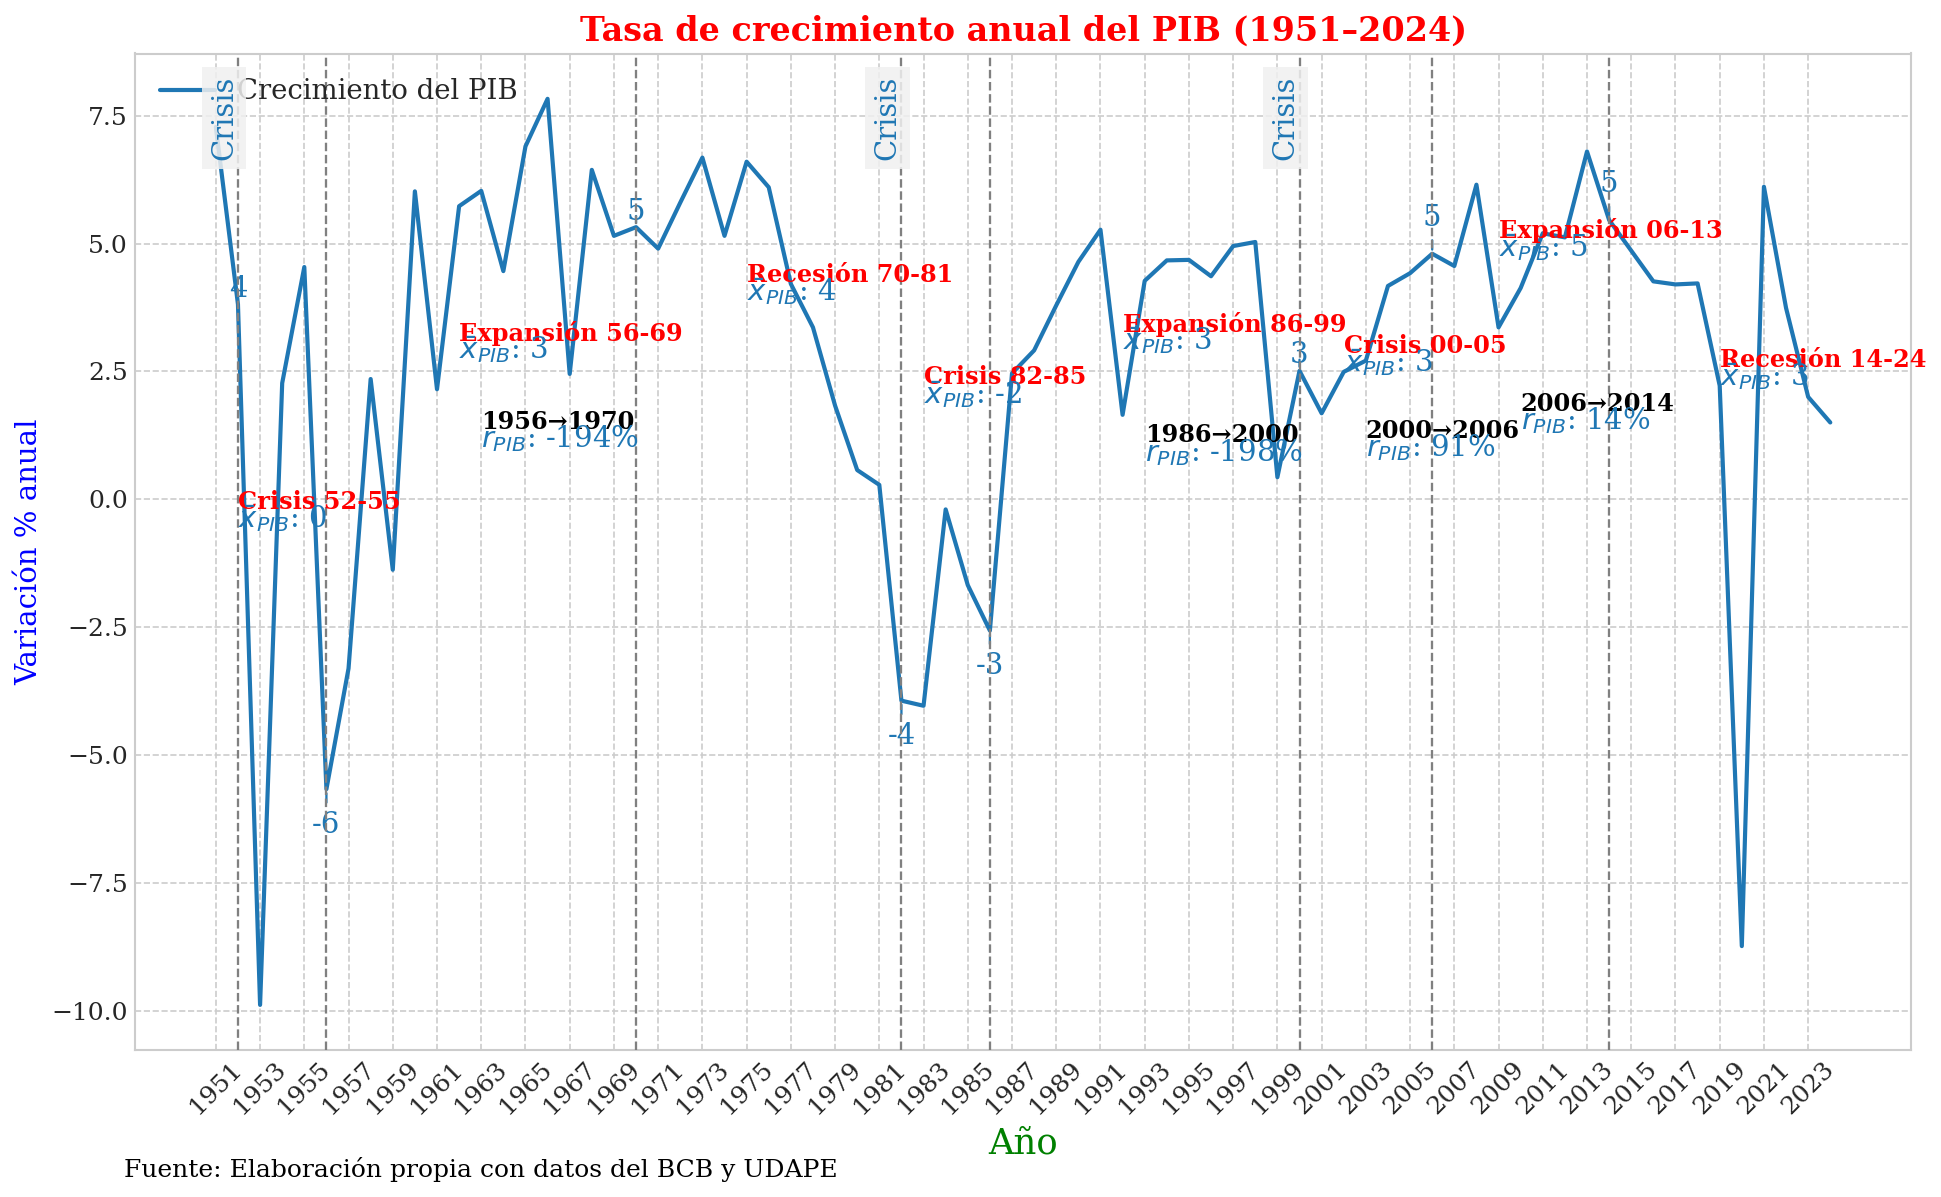

In [3]:
# tasa_crecimiento_pib.py
# ---
# jupyter:
#   jupytext:
#     formats: notebooks/tesis/serie_completa///ipynb,scripts/tesis/serie_completa///py:percent
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
# ---

# %%
# ── 1. Imports y configuración general ───────────────────────────────
import os, sys, sqlite3
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *

output_dir = "../../../../assets/tesis/serie_completa/pib"
os.makedirs(output_dir, exist_ok=True)
set_style()

# %%
# ── 2. Carga de datos ────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (
        pd.read_sql('SELECT * FROM tasa_crecimiento_pib', conn, index_col='año')
        .sort_index()
    )

# %%
# ── 3. Componentes y configuración ───────────────────────────────────
componentes = [("crecimiento", "Crecimiento del PIB")]
cols_componentes = ["crecimiento"]

abbr = {"crecimiento": "PIB"}
colors = {"crecimiento": "#1f77b4"}

# %%
# ── 4. Preparación de ciclos y periodos ──────────────────────────────
annot_years = adjust_annot_years(df, annot_years)
cycles = adjust_cycles(df, CYCLES)
cycle_stats = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in cycles.items()
}
periodos = adjust_periods(df, periodos_tasas)

# %%
# ── 5. Offsets ───────────────────────────────────────────────────────
annotation_offsets = {
    "crecimiento": {
        1952: (0,  0.3),   # 3.81% → leve arriba
        1956: (0, -0.7),   # -5.67% → debajo
        1970: (0,  0.3),   # 5.32% → leve arriba
        1982: (0, -0.7),   # -3.94% → debajo
        1986: (0, -0.7),   # -2.57% → debajo
        2000: (0,  0.3),   # 2.51% → leve arriba
        2006: (0,  0.7),   # 4.80% → un poco más arriba
        2014: (0,  0.7),   # 5.46% → un poco más arriba
        2023: (0,  0.3),   # 2.00% → leve arriba
    }
}

# Offset de posición vertical para los hitos
hitos_offset = {
    1952: 0.95,
    1956: 0.95,
    1970: 0.95,
    1982: 0.95,
    1986: 0.95,
    2000: 0.95,
    2006: 0.95,
    2014: 0.95,
    2023: 0.95,
}

# Medias por ciclo: ubicamos los cuadros justo por encima de la media histórica
# (y_frac = media_valor / y_max_estimado ≈ media/8)
medias_offsets = {
    "Crisis 52-55":       (1952, 0.02),   # media ≈ 0.18%
    "Expansión 56-69":    (1962, 0.40),   # media ≈ 3.23%
    "Recesión 70-81":     (1975, 0.53),   # media ≈ 4.23%
    "Crisis 82-85":       (1983, 0.30),   # media ≈ –2.47% (lo muestro sobre cero)
    "Expansión 86-99":    (1992, 0.42),   # media ≈ 3.32%
    "Crisis 00-05":       (2002, 0.37),   # media ≈ 3.00%
    "Expansión 06-13":    (2009, 0.63),   # media ≈ 5.02%
    "Recesión 14-24":     (2019, 0.34),   # media ≈ 2.71%
}

# Tasas de crecimiento anotadas por periodo
tasas_offsets = {
    "1956-1970": (1963, 0.20),  # 56→70 ≈ 8 % acumulado
    "1970-1982": (1976, 0.17),  # 70→82 ≈ 6 %
    "1986-2000": (1993, 0.17),  # 86→00 ≈ 9 %
    "2000-2006": (2003, 0.18),  # 00→06 ≈ 8 %
    "2006-2014": (2010, 0.24),  # 06→14 ≈ 7 %
    "2014-2022": (2018, 0.12),  # 14→22 ≈ 4 %
}

# %%
# ── 6. Generación de la gráfica ──────────────────────────────────────
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=colors,
    title=f"Tasa de crecimiento anual del PIB ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Variación % anual",
    source_text="Fuente: Elaboración propia con datos del BCB y UDAPE"
)

add_hitos(ax, df.index, hitos_v, hitos_offset)
add_year_value_annotations(
    ax, df, annot_years,
    cols_componentes, annotation_offsets, colors
)
add_cycle_means_multi(
    ax, cycle_stats, medias_offsets,
    abbr, colors, line_spacing=ax.get_ylim()[1]*0.03
)
add_period_growth_annotations_multi(
    ax, df, periodos, cols_componentes,
    tasas_offsets, colors, abbr
)

plt.savefig(os.path.join(output_dir, "tasa_crecimiento_pib.png"))
plt.show()

